In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#I created the dataset through excel so my file format was .xlsx, here i turn my .xlsx file to .csv

excel_file = "/content/QDataset.xlsx"

df = pd.read_excel(excel_file)
csv_file= '/content/QDataset.csv'
df.to_csv(csv_file, index=False)

In [ ]:
df.head()

,Type,Questions,QID,ChatGPT-3.5,Phi-2,Bard
0,Physics,Which metal is generally used for making elect...,1,1,1,1
1,Logic,I am an odd number. Take away one letter and I...,2,1,0,1
2,Logic,"There is a basket containing 5 apples, how do ...",3,1,0,1
3,Logic,The day before yesterday I was 25. The next ye...,4,0,0,1
4,Math,How to get a number 100 by using four sevens (...,5,1,0,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(style="whitegrid")

Text(0.5, 1.0, 'Bard')

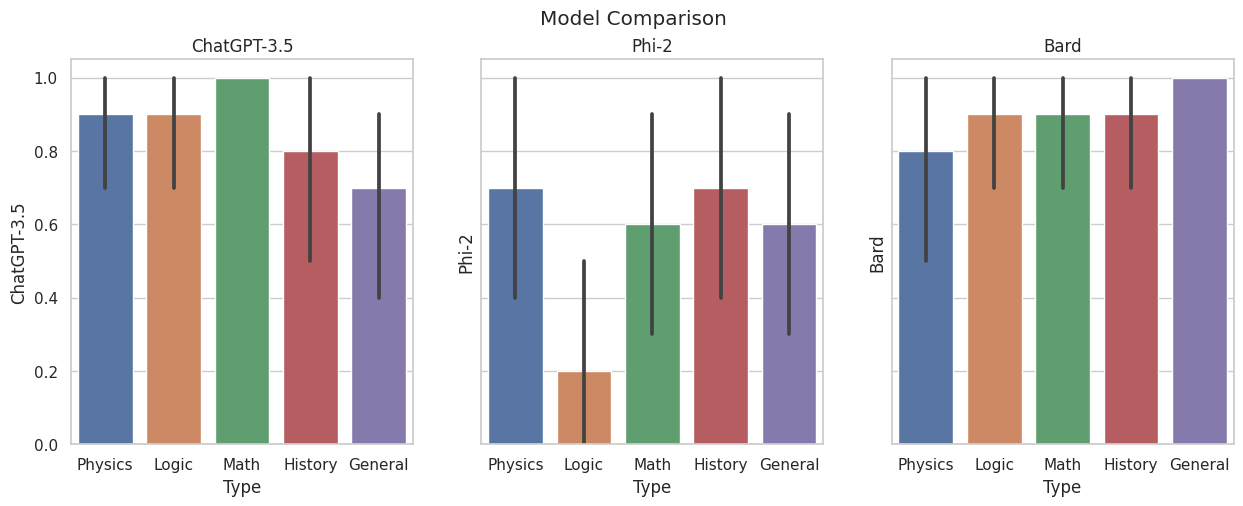

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Model Comparison')

sns.barplot(ax=axes[0], x="Type", y="ChatGPT-3.5", data=df)
axes[0].set_title("ChatGPT-3.5")

sns.barplot(ax=axes[1], x="Type", y="Phi-2", data=df)
axes[1].set_title("Phi-2")

sns.barplot(ax=axes[2], x="Type", y="Bard", data=df)
axes[2].set_title("Bard")

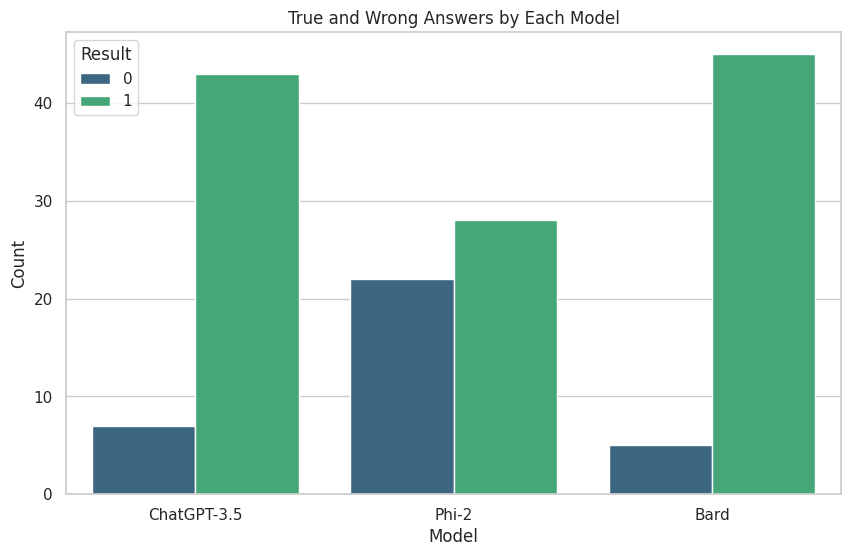

In [ ]:
df_melted = pd.melt(df, id_vars=['Type', 'Questions', 'QID'], var_name='Model', value_name='Result')

plt.figure(figsize=(10, 6))
sns.countplot(x='Model', hue='Result', data=df_melted, palette='viridis')
plt.title('True and Wrong Answers by Each Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [ ]:
#Calculating accuracy

TotalQuestions = 50


TrueCountGPT = df['ChatGPT-3.5'].sum()
ChatGPTAccuracy = TrueCountGPT/TotalQuestions

TrueCountPhi2 = df['Phi-2'].sum()
Phi2Accuracy = TrueCountPhi2/TotalQuestions

TrueCountBard = df['Bard'].sum()
BardAccuracy = TrueCountBard/TotalQuestions


print(f"ChatGPT-3.5 Accuracy: {ChatGPTAccuracy}, Phi-2 Accuracy: {Phi2Accuracy}, Bard Accuracy: {BardAccuracy}")

ChatGPT-3.5 Accuracy: 0.86, Phi-2 Accuracy: 0.56, Bard Accuracy: 0.9
